In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data collection and processing

In [2]:
gold_dataset = pd.read_csv('/content/drive/MyDrive/ML datasets/Gold Price Prediction(RFR)/gld_price_data.csv')
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_dataset.shape

(2290, 6)

In [4]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation between the different columns in a dataset
Darker color means that the columns are positively correlated an the lighter or negative means that they are negatively correlated.

cbar = color bar

square =the shape of the box

fmt = number of floating points we want

annot = annotations. the column and row labels basically

annot_kws = the size of the text

cmap = color of the map

<ipython-input-8-3ec9289446aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

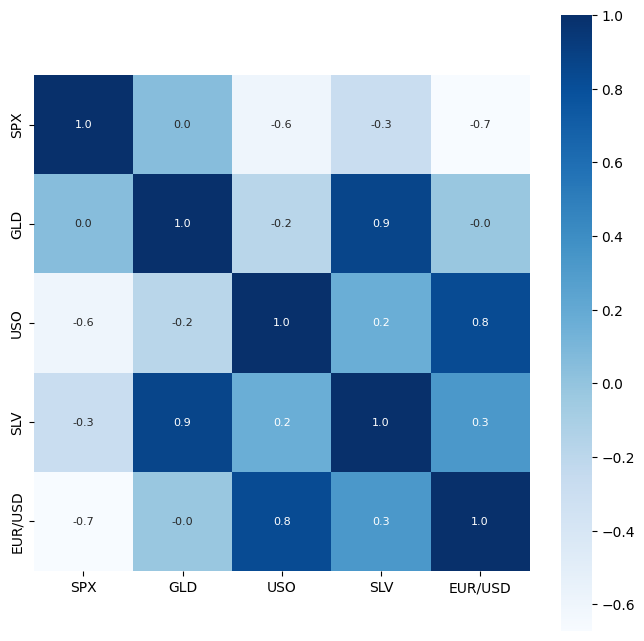

In [8]:
correlation = gold_dataset.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar =True, square =True, fmt = '.1f', annot= True, annot_kws = {'size':8}, cmap = 'Blues')

In [9]:
# correlation values for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-10-d36b3c899ddc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color ='green')


<Axes: xlabel='GLD', ylabel='Density'>

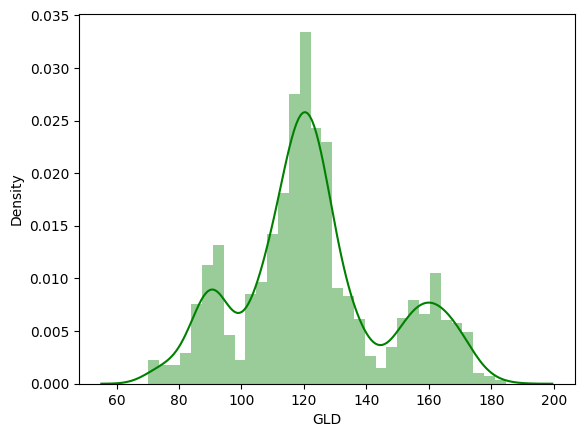

In [10]:
#Checking the distribution of the GLD price
sns.distplot(gold_dataset['GLD'], color ='green')

#here density is nothing but the number of values we have

## Splitting the features and target

In [11]:
x = gold_dataset.drop(['Date', 'GLD'], axis = 1)
y = gold_dataset['GLD']

In [12]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

# Model training: Random Forest Regressor
it is an ensemble model. ensemble model means multiple model joined together. this particular model is a join pf decision trees

In [25]:
regressor = RandomForestRegressor(n_estimators = 100)

In [26]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
test_data_prediction = regressor.predict(x_test)

In [28]:
# error evaluation. As this is  regression model, we are using R2 score
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)


# this score(0.98) does not mean 98%. this is an error value, the less the better.
#it doesn't even tell us how good our model is or the prediction is. for that we need to plot in a graph

0.9891425632251913


## Plotting our result in a graph

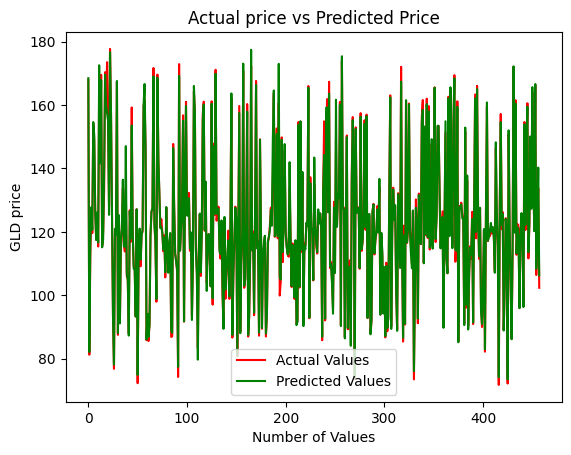

In [29]:
y_test = list(y_test)
plt.plot(y_test, color = 'red', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.title('Actual price vs Predicted Price')
plt.legend()
plt.show()